<a href="https://colab.research.google.com/github/YutangSSS/2025_Fall_Data_Science_Project/blob/main/Battery_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.Data Preprocessing
1.1 Loading the Datasets



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Dataset 1: Battery_Dataset
df = pd.read_csv('/content/Battery_Dataset.csv')
df.head()


,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,label
0,1.0,0.5854,0.6264,0.1831,0.9565,0.6916,0.8313,0.0013,0.6009,0.8990,...,178.0,118.0,134.0,100.0,13.9979,38.2668,17.9817,99.0730,105.3900,Defective
1,2.0,0.6277,0.3841,0.9643,0.8983,0.7368,0.6697,0.5944,0.3834,0.5202,...,126.0,181.0,138.0,188.0,17.3912,29.6871,13.2000,91.5065,91.0022,Normal
2,3.0,0.5428,0.2937,0.8526,0.1832,0.3926,0.9452,0.7864,0.4080,0.1031,...,167.0,185.0,170.0,155.0,19.0598,21.3550,14.8912,94.0078,104.6440,Normal
3,4.0,0.6681,0.3668,0.0285,0.1562,0.6242,0.6803,0.3512,0.9594,0.9915,...,188.0,185.0,201.0,178.0,43.5533,26.9088,41.6869,91.2644,119.1470,Normal
4,5.0,0.6151,0.2683,0.7491,0.0421,0.4958,0.5506,0.1825,0.4667,0.2757,...,161.0,136.0,108.0,200.0,49.5778,17.9420,28.0971,97.4035,100.4430,Normal


In [ ]:
# Display information about the dataset
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          255 non-null    float64
 1   feature_1   255 non-null    float64
 2   feature_2   255 non-null    float64
 3   feature_3   255 non-null    float64
 4   feature_4   255 non-null    float64
 5   feature_5   255 non-null    float64
 6   feature_6   255 non-null    float64
 7   feature_7   255 non-null    float64
 8   feature_8   255 non-null    float64
 9   feature_9   255 non-null    float64
 10  feature_10  255 non-null    float64
 11  feature_11  255 non-null    float64
 12  feature_12  255 non-null    float64
 13  feature_13  255 non-null    float64
 14  feature_14  255 non-null    float64
 15  feature_15  255 non-null    float64
 16  feature_16  255 non-null    float64
 17  feature_17  255 non-null    float64
 18  feature_18  255 non-null    float64
 19  feature_19  255 non-null    f

In [ ]:
print(df.isna().sum())

ID            477
feature_1     477
feature_2     477
feature_3     477
feature_4     477
feature_5     477
feature_6     477
feature_7     477
feature_8     477
feature_9     477
feature_10    477
feature_11    477
feature_12    477
feature_13    477
feature_14    477
feature_15    477
feature_16    477
feature_17    477
feature_18    477
feature_19    477
feature_20    477
feature_21    477
feature_22    477
feature_23    477
feature_24    477
feature_25    477
feature_26    477
feature_27    477
feature_28    477
feature_29    477
feature_30    477
feature_31    477
feature_32    477
label         477
dtype: int64


In [ ]:

df.dropna(inplace=True)
df_cleaned = df.dropna(how='all')

In [ ]:
print("Dataset after cleaning:")
print(df.info())
print(df.head())

Dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 255 entries, 0 to 254
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          255 non-null    float64
 1   feature_1   255 non-null    float64
 2   feature_2   255 non-null    float64
 3   feature_3   255 non-null    float64
 4   feature_4   255 non-null    float64
 5   feature_5   255 non-null    float64
 6   feature_6   255 non-null    float64
 7   feature_7   255 non-null    float64
 8   feature_8   255 non-null    float64
 9   feature_9   255 non-null    float64
 10  feature_10  255 non-null    float64
 11  feature_11  255 non-null    float64
 12  feature_12  255 non-null    float64
 13  feature_13  255 non-null    float64
 14  feature_14  255 non-null    float64
 15  feature_15  255 non-null    float64
 16  feature_16  255 non-null    float64
 17  feature_17  255 non-null    float64
 18  feature_18  255 non-null    float64
 19  feature_19

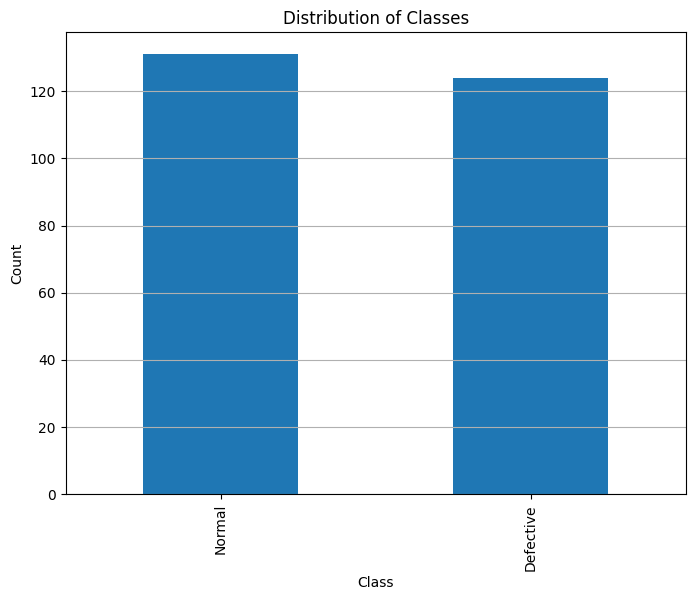

In [ ]:
# Distribution of the two classes
class_distribution = df['label'].value_counts()

# Plotting the distribution of the two classes
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()



In [ ]:
def plot_features_against_target(df, target_column):
    # Select all columns except the target and ID
    features = [col for col in df.columns if col != target_column and col != 'ID']
    num_features = len(features)

    # Arrange the subplots
    cols = 5  # Number of plots per row
    rows = (num_features + cols - 1) // cols  # Automatically calculate rows

    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
    axes = axes.flatten()  # Flatten in case of multiple rows

    for i, feature in enumerate(features):
        # Create scatter plot
        axes[i].scatter(df[feature], pd.factorize(df[target_column])[0], s=5)

        # Add labels and titles
        axes[i].set_xlabel(feature, fontsize=8)
        axes[i].set_ylabel(target_column, fontsize=8)
        axes[i].set_title(f'{feature} vs {target_column}', fontsize=10)
        axes[i].tick_params(axis='both', which='major', labelsize=6)

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


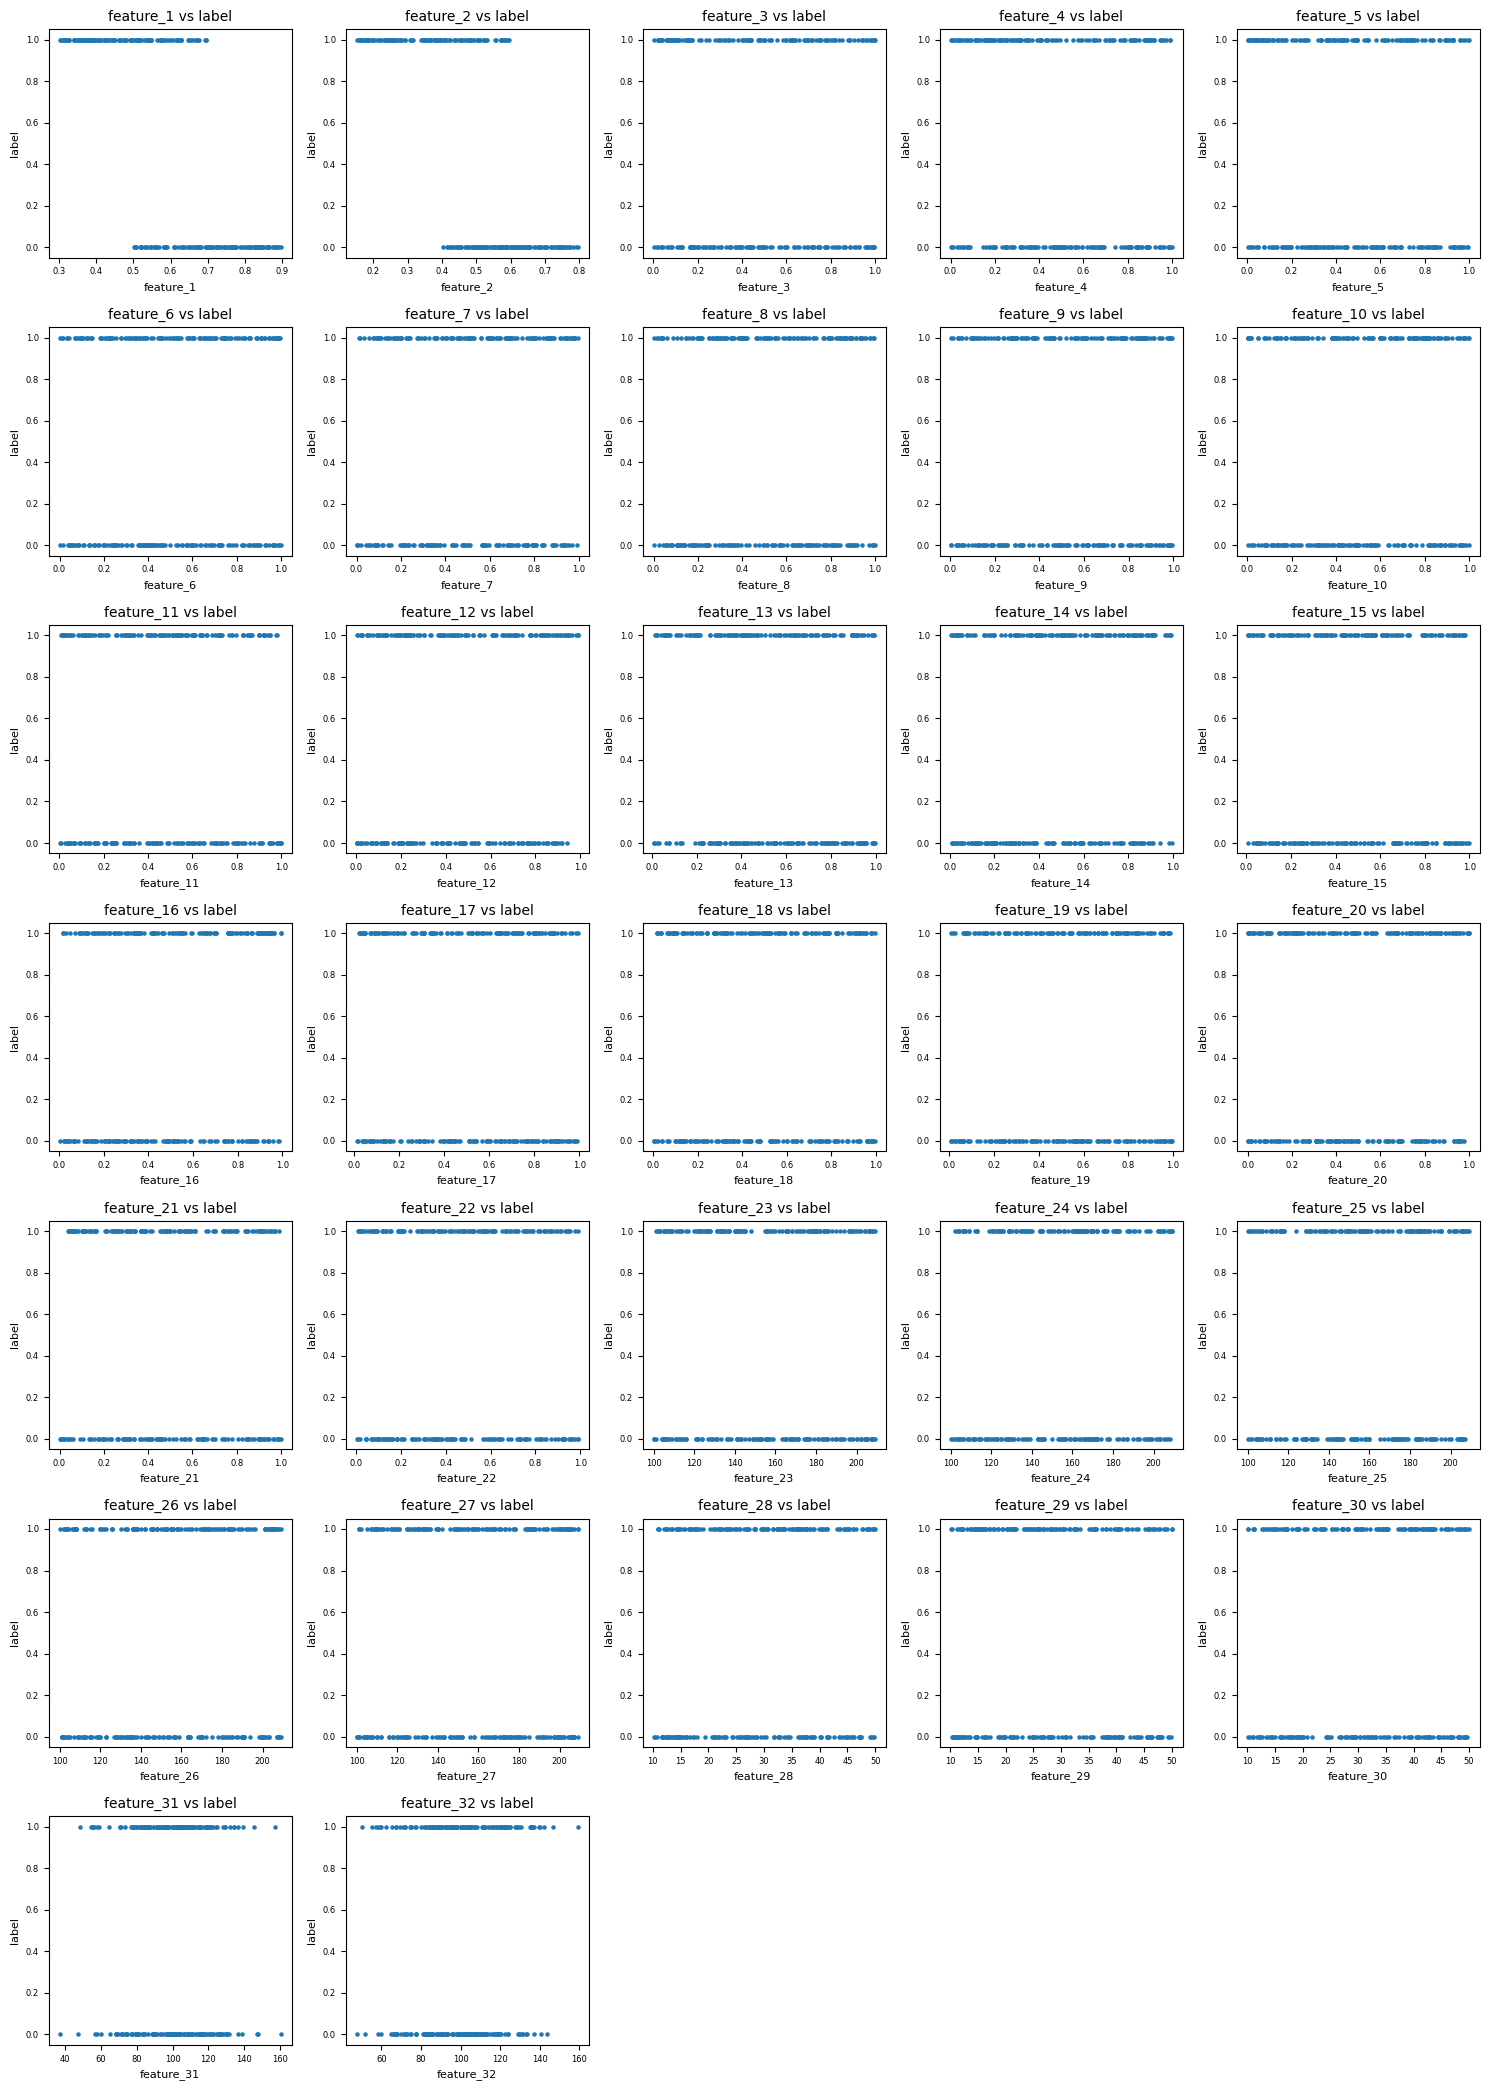

In [ ]:
plot_features_against_target(df, 'label')

These Scatter plot graphs show label are clearly either 0 or 1 which means we are dealing with a binary classification problem.

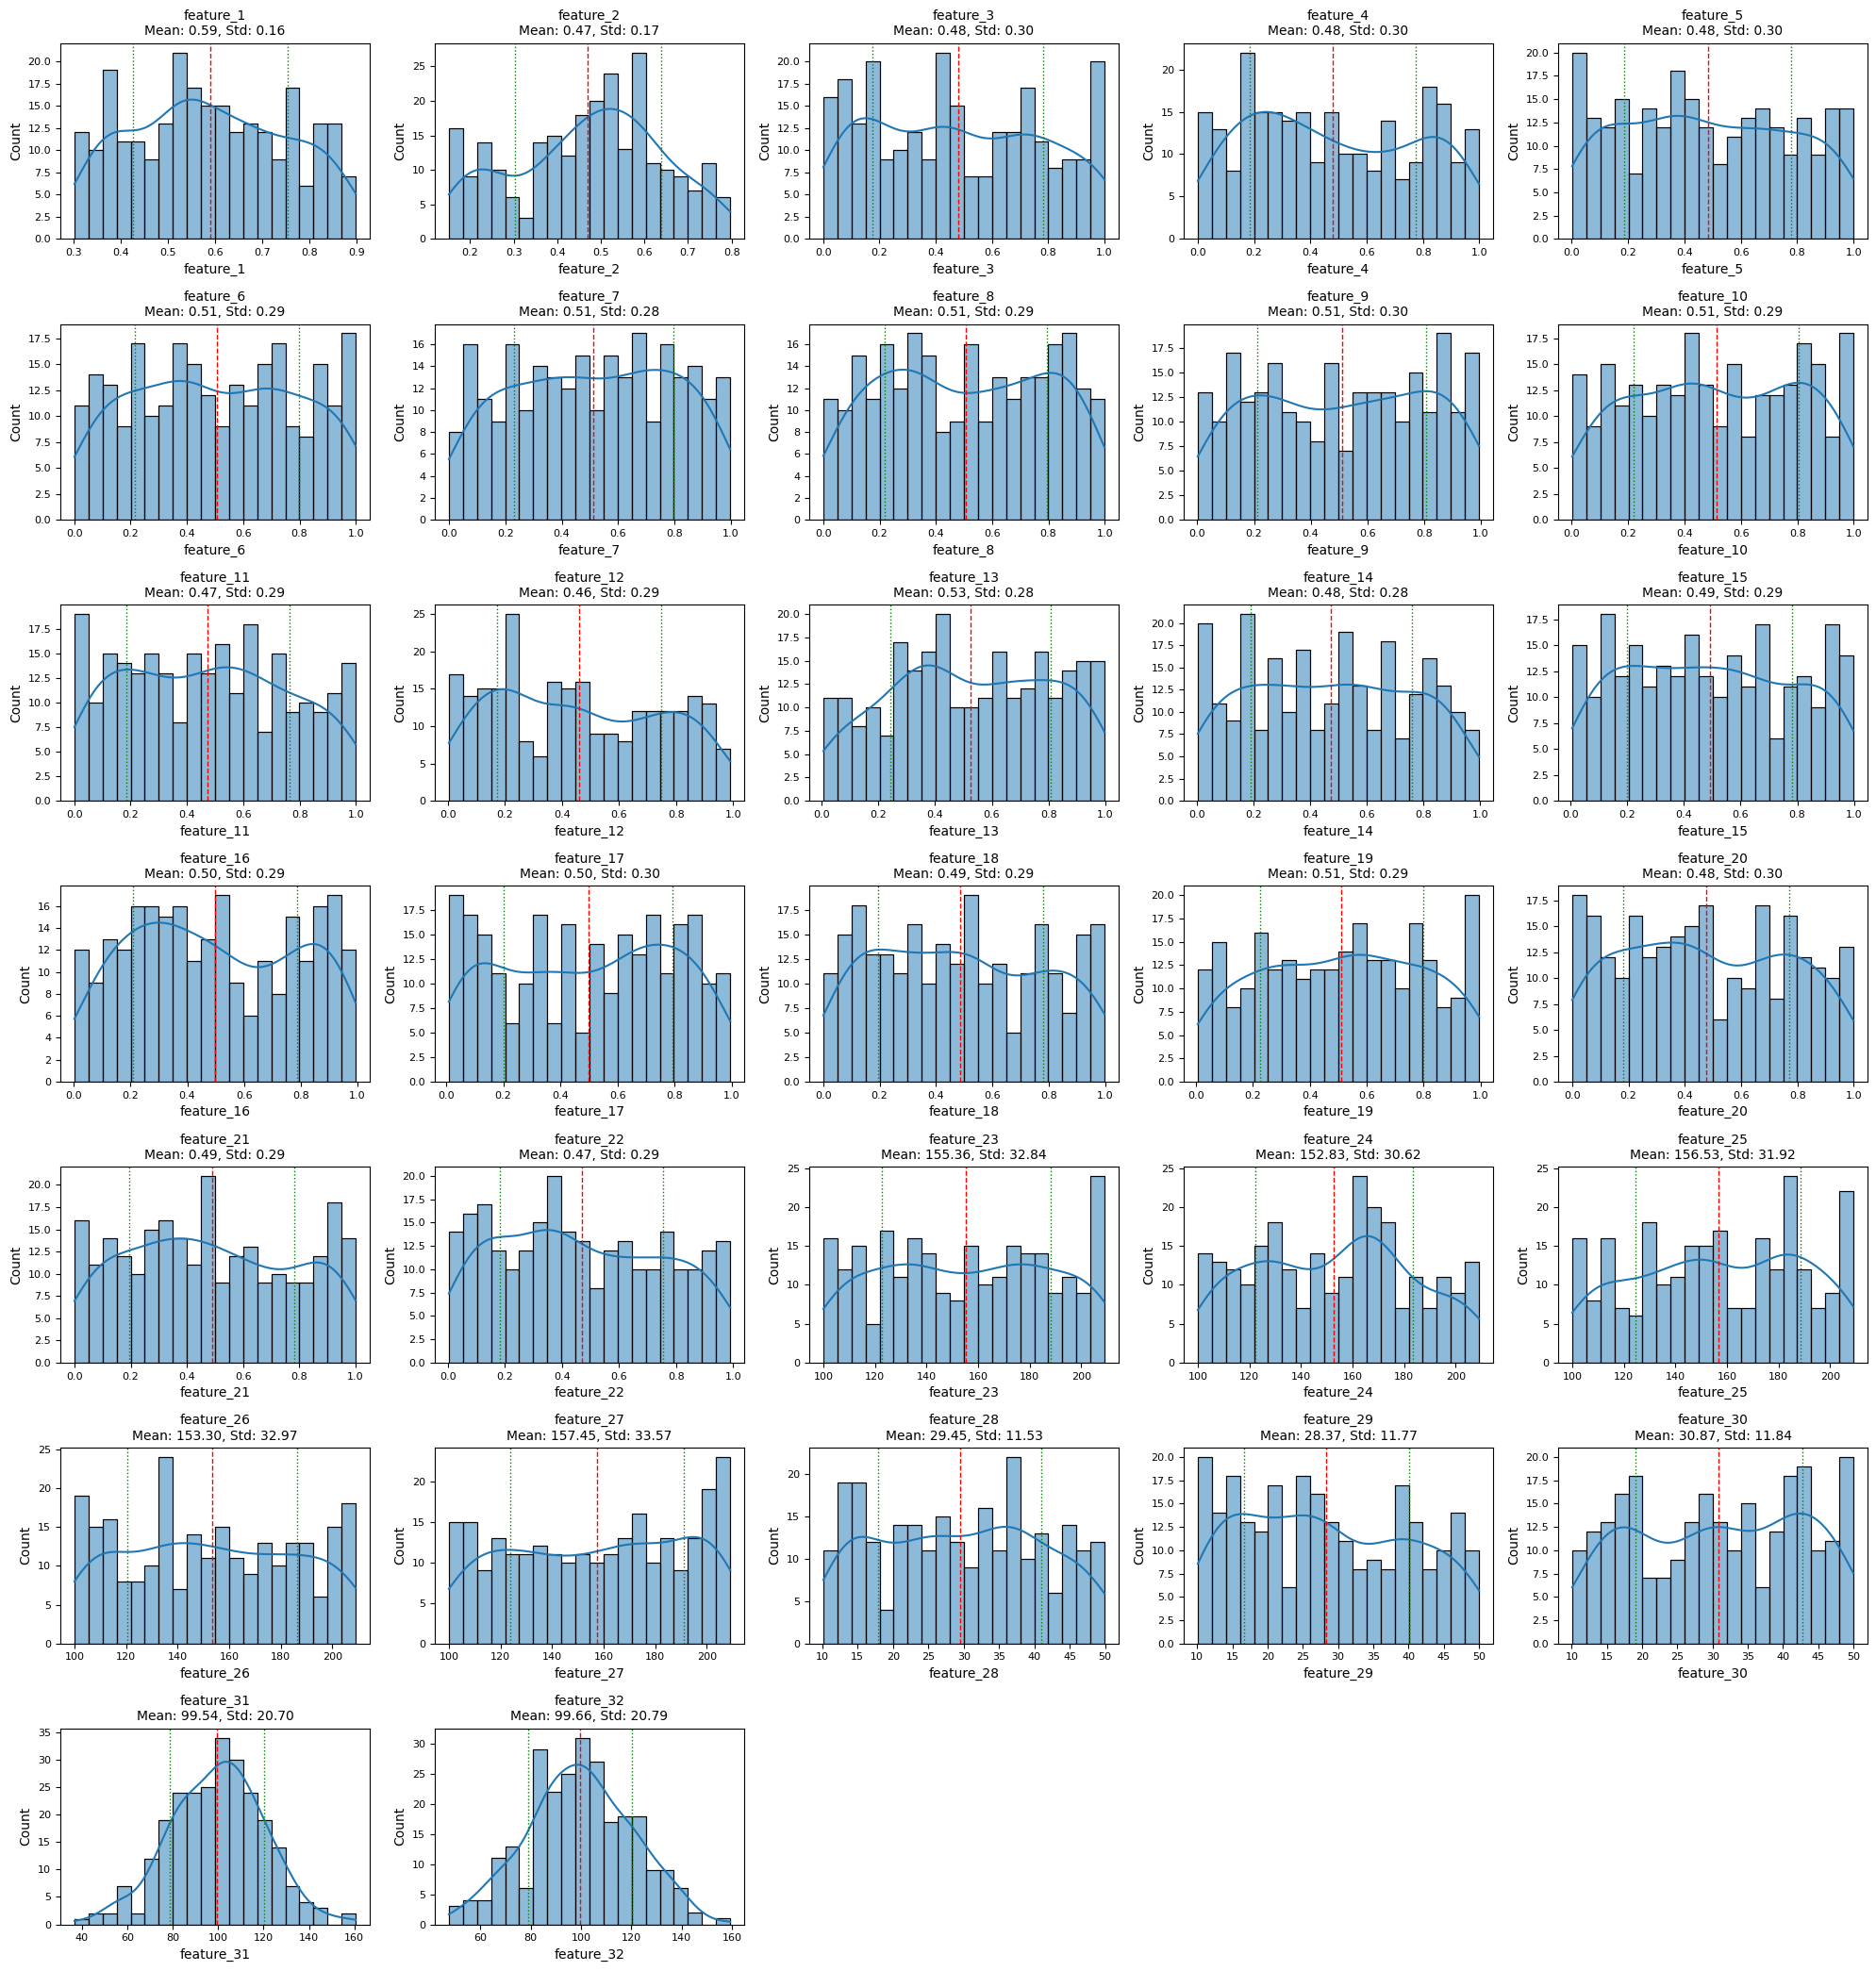

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_histograms_with_stats(df, cols_per_row=5):
    features = [col for col in df.columns if df[col].dtype != 'object' and col != 'ID']
    num_features = len(features)
    rows = (num_features + cols_per_row - 1) // cols_per_row

    fig, axes = plt.subplots(rows, cols_per_row, figsize=(4 * cols_per_row, 3 * rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.histplot(df[feature], bins=20, kde=True, ax=axes[i])

        # Calculate statistics
        mean = np.mean(df[feature])
        std = np.std(df[feature])

        # Plot stats as vertical lines
        axes[i].axvline(mean, color='r', linestyle='dashed', linewidth=1)
        axes[i].axvline(mean + std, color='g', linestyle='dotted', linewidth=1)
        axes[i].axvline(mean - std, color='g', linestyle='dotted', linewidth=1)

        # Add titles with stats
        axes[i].set_title(f'{feature}\nMean: {mean:.2f}, Std: {std:.2f}', fontsize=10)
        axes[i].tick_params(axis='both', labelsize=8)

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage
plot_histograms_with_stats(df)


These histograms show well balanced shapes suggest a normal distruibution

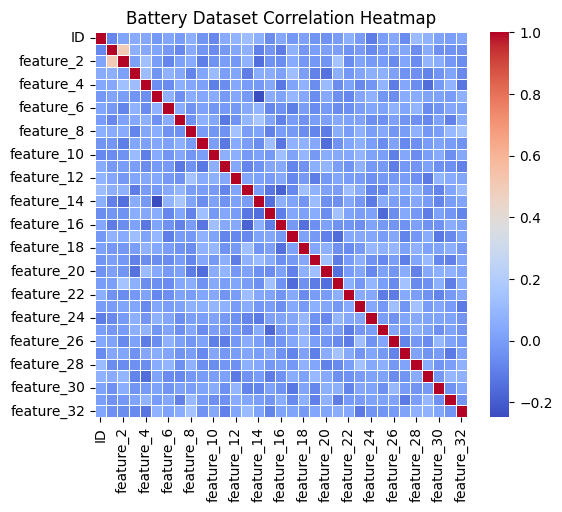

In [ ]:
numerical_features = df_cleaned.select_dtypes(include=['number'])

# Function to plot Spearman correlation heatmap
def plot_spearman_correlation_heatmap(df):
    plt.figure(figsize=(6, 5))

    # Calculate Spearman correlation
    correlation_matrix = df.corr(method='spearman')

    # Plot heatmap
    sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='coolwarm', linewidths=0.5)
    plt.title('Battery Dataset Correlation Heatmap')
    plt.show()

plot_spearman_correlation_heatmap(numerical_features)


From the correlation matrix, we could see that numerical features are not highly coleratted with each other which means those variables will independantly informative.

##2. Model Implementation-Logistic Regression

In [ ]:
## 2.1 Logistic Regression Implementation from Scratch

In [22]:
import numpy as np

def logistic(z):
    return 1 / (1 + np.exp(-z))

class LogisticRegression:

    def __init__(self, add_bias=True, learning_rate=0.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.max_iters = int(max_iters)  # Ensure integer type
        self.verbose = verbose

    def gradient(self, x, y, lambda_=0.01):
        N, D = x.shape
        yh = logistic(np.dot(x, self.w))
        grad = (np.dot(x.T, yh - y) / N) + lambda_ * self.w  # L2 Regularization
        return grad

    def cost(self, x, y):
        yh = logistic(np.dot(x, self.w))
        return -np.mean(y * np.log(yh + 1e-15) + (1 - y) * np.log(1 - yh + 1e-15))

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x, np.ones(N)])
        N, D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0

        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g
            t += 1

            if self.verbose and t % 1000 == 0:
                print(f'Iteration {t}: Cost = {self.cost(x, y):.4f}')

        if self.verbose:
            print(f'Terminated after {t} iterations, with gradient norm = {np.linalg.norm(g)}')
            print(f'Final weights: {self.w}')
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x, np.ones(Nt)])
        yh = logistic(np.dot(x, self.w))
        return (yh >= 0.5).astype(int)


Iteration 1000: Cost = 0.0892
Terminated after 1520 iterations, with gradient norm = 9.984558149592898e-05
Final weights: [2.28305342]


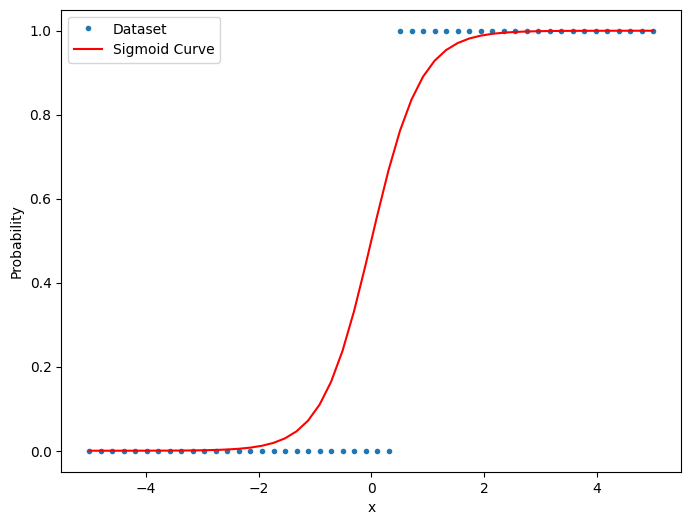

In [26]:
N = 50
x = np.linspace(-5, 5, N)
y = (x > 0.5).astype(int)

# Fit the model and compute probabilities
model = LogisticRegression(verbose=True, add_bias=False)
model.fit(x, y)
probabilities = logistic(np.dot(x[:, None], model.w))  # Compute probabilities

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, y, '.', label='Dataset')                   # Actual data points
plt.plot(x, probabilities, 'r-', label='Sigmoid Curve')  # Sigmoid probabilities
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()

# Save the plot
plt.savefig('Battery_Sigmoid_Curve.png', bbox_inches="tight", dpi=300)
plt.show()


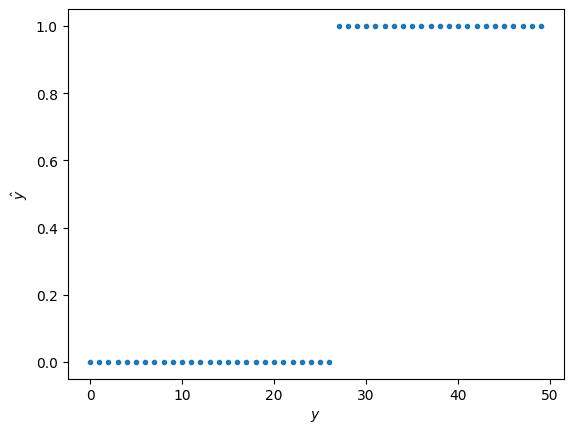

In [30]:
plt.plot(y, '.')
plt.xlabel(r'$y$')
plt.ylabel(r'$\hat{y}$')
plt.savefig('battery_prediction_yh_vs_y.png', bbox_inches="tight", dpi=300)